# Week 1 in class



In [9]:
# Pkg.add("JuMP")
# Pkg.add("GLPKMathProgInterface")
# Pkg.add("PyPlot")

INFO: Cloning cache of ColorTypes from https://github.com/JuliaGraphics/ColorTypes.jl.git
INFO: Cloning cache of Colors from https://github.com/JuliaGraphics/Colors.jl.git
INFO: Cloning cache of FixedPointNumbers from https://github.com/JuliaMath/FixedPointNumbers.jl.git
INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of MacroTools from https://github.com/MikeInnes/MacroTools.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Cloning cache of Reexport from https://github.com/simonster/Reexport.jl.git
INFO: Installing ColorTypes v0.6.6
INFO: Installing Colors v0.8.2
INFO: Installing FixedPointNumbers v0.4.3
INFO: Installing LaTeXStrings v0.3.0
INFO: Installing MacroTools v0.4.0
INFO: Installing PyCall v1.15.0
INFO: Installing PyPlot v2.3.2
INFO: Installing Reexport v0.1.0
INFO: Building Conda
INFO: Building PyCall


Solving environment: ...working... done


libgfortran 3.0.1: ########## | 100% 
mkl 2018.0.1: ########## | 100% 
intel-openmp 2018.0.0: ########## | 100% 
numpy 1.14.0: #########  |  90% 


## Package Plan ##

  environment location: /Users/kenwancheung/.julia/v0.6/Conda/deps/usr

  added / updated specs: 
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libgfortran-3.0.1          |       h93005f0_2         495 KB
    mkl-2018.0.1               |       hfbd8650_4       155.1 MB
    intel-openmp-2018.0.0      |       h8158457_8         493 KB
    numpy-1.14.0               |   py27h8a80b8c_0         3.9 MB
    ------------------------------------------------------------
                                           Total:       159.9 MB

The following NEW packages will be INSTALLED:

    intel-openmp: 2018.0.0-h8158457_8  
    libgfortran:  3.0.1-h93005f0_2     
    mkl:          2018.0.1-hfbd8650_4  
    numpy:        1.14.0-py27h8a80b8c_0


Preparing transaction: ...working... 

numpy 1.14.0: ########## | 100% 


done
Verifying transaction: ...working... done
Executing transaction: ...working... done


INFO: PyCall is using /Users/kenwancheung/.julia/v0.6/Conda/deps/usr/bin/python (Python 2.7.14) at /Users/kenwancheung/.julia/v0.6/Conda/deps/usr/bin/python, libpython = /Users/kenwancheung/.julia/v0.6/Conda/deps/usr/lib/libpython2.7
INFO: /Users/kenwancheung/.julia/v0.6/PyCall/deps/deps.jl has been updated
INFO: /Users/kenwancheung/.julia/v0.6/PyCall/deps/PYTHON has been updated
INFO: Package database updated


In [16]:
# using JuMP
# using GLPKMathProgInterface
# using PyPlot

In [7]:
myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, 0.25*x1+x2)
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [8]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))


  2.871687 seconds (1.43 M allocations: 75.043 MiB, 1.98% gc time)
Objective value: 1.0
x1 = 0.0
x2 = 1.0


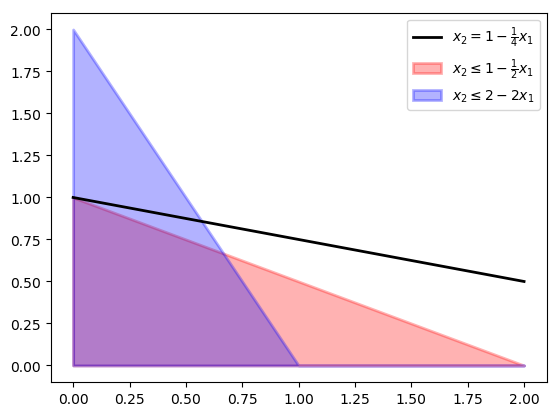

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ifelse(::BitArray{1}, ::Array{Float64,1}, ::Int64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /Users/kenwancheung/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/kenwancheung/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/kenwancheung/.julia/v0.6/Compat/src/Compat.jl:496
 [7] eventloop(::ZMQ.Socket) at /Users/kenwancheung/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], in expression starting on line 3


PyObject <matplotlib.legend.Legend object at 0x130e1ac90>

In [18]:
x1 = collect(0:0.1:2)
x2a = 1-0.5*x1
x2b = ifelse(2-2*x1.>=0,2-2*x1,0)
x2c = 1-0.25*x1

fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 1 - \frac{1}{4}x_{1}",alpha=1)
ax[:legend](loc="upper right")

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ifelse(::BitArray{1}, ::Array{Float64,1}, ::Int64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /Users/kenwancheung/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/kenwancheung/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/kenwancheung/.julia/v0.6/Compat/src/Compat.jl:496
 [7] eventloop(::ZMQ.Socket) at /Users/kenwancheung/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[19], in expression starting on line 3
No handlers could be found for logger "matplotlib.legend"
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ifelse(::BitArray{1}, ::Array{Float64,1}, ::Float64) at ./deprecated.jl:57
 [3] include_string

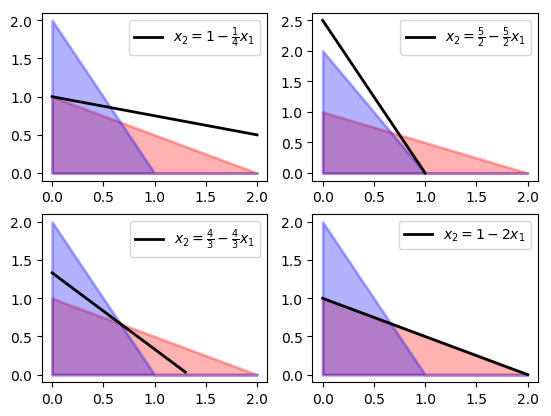

PyObject <matplotlib.legend.Legend object at 0x139f12a90>

In [19]:
x1 = collect(0:0.1:2)
x2a = 1-0.5*x1
x2b = ifelse(2-2*x1.>=0,2-2*x1,0)

fig, ax = subplots(2,2)

x2c = 1-0.25*x1

ax[1,1][:fill_between](x1,x2a,color="red",linewidth=2,label="",alpha=0.3)
ax[1,1][:legend](loc="upper right")
ax[1,1][:fill_between](x1,x2b,color="blue",linewidth=2,label="",alpha=0.3)
ax[1,1][:legend](loc="upper right")
ax[1,1][:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 1 - \frac{1}{4}x_{1}",alpha=1)
ax[1,1][:legend](loc="upper right")

x2c = ifelse(2.5-2.5*x1.>=0,2.5-2.5*x1,NaN)

ax[1,2][:fill_between](x1,x2a,color="red",linewidth=2,label="",alpha=0.3)
ax[1,2][:legend](loc="upper right")
ax[1,2][:fill_between](x1,x2b,color="blue",linewidth=2,label="",alpha=0.3)
ax[1,2][:legend](loc="upper right")
ax[1,2][:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = \frac{5}{2} - \frac{5}{2} x_{1}",alpha=1)
ax[1,2][:legend](loc="upper right")

x2c = ifelse(4/3-x1.>=0,4/3-x1,NaN)

ax[2,1][:fill_between](x1,x2a,color="red",linewidth=2,label="",alpha=0.3)
ax[2,1][:legend](loc="upper right")
ax[2,1][:fill_between](x1,x2b,color="blue",linewidth=2,label="",alpha=0.3)
ax[2,1][:legend](loc="upper right")
ax[2,1][:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = \frac{4}{3} - \frac{4}{3} x_{1}",alpha=1)
ax[2,1][:legend](loc="upper right")

x2c = ifelse(1-.5*x1.>=0,1-.5*x1,NaN)

ax[2,2][:fill_between](x1,x2a,color="red",linewidth=2,label="",alpha=0.3)
ax[2,2][:legend](loc="upper right")
ax[2,2][:fill_between](x1,x2b,color="blue",linewidth=2,label="",alpha=0.3)
ax[2,2][:legend](loc="upper right")
ax[2,2][:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 1 - 2 x_{1}",alpha=1)
ax[2,2][:legend](loc="upper right")

In [20]:
sfLpModel = Model(solver=GLPKSolverLP())
# slack vars
c = [3/2; 3/2; 1; 0; 0]
b = [1;2]
# 1 on x4, 0 on x5. 
# 0 on x4, 1 on x5
A= [
     0.5 0.5 1 1 0;
     2   2   1 0 1
    ]
m, n = size(A)
@variable(sfLpModel, x[1:n] >= 0)
for i=1:m
    # sum across A[1,j]*x[j], for 1:5.
    # .5*x1 + .5*x2 +1*x3 + 1*0 + 1*0 etc...
    @constraint(sfLpModel, sum{A[i,j]*x[j] , j=1:n} == b[i])
end
@objective(sfLpModel, Max, sum{c[j]*x[j], j=1:n})
println("The optimization problem to be solved is:")
print(sfLpModel)


The optimization problem to be solved is:


Max 1.5 x[1] + 1.5 x[2] + x[3]
Subject to
 0.5 x[1] + 0.5 x[2] + x[3] + x[4] = 1
 2 x[1] + 2 x[2] + x[3] + x[5] = 2
 x[i] ≥ 0 ∀ i ∈ {1,2,3,4,5}


In [21]:
@time begin
status = solve(sfLpModel)
end
println("Objective value: ", getobjectivevalue(sfLpModel))
println("Optimal solution is x = \n", getvalue(x))


  1.073244 seconds (548.63 k allocations: 28.288 MiB, 1.88% gc time)
Objective value: 1.6666666666666665
Optimal solution is x = 
[0.666667, 0.0, 0.666667, 0.0, 0.0]
